# Business Statistics: EDA & Insurance claims

## Problem Statement

## Explore the dataset and extract insights from the data. Using statistical evidence to

1. Prove (or disprove) that the medical claims made by the people who smoke is greater than those who don't?
2. Prove (or disprove) with statistical evidence that the BMI of females is different from that of males.
3. Is the proportion of smokers significantly different across different regions?


In [299]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import chi2_contingency   

In [4]:
file_path = (r"C:\Users\aravit01\OneDrive - Kearney\1. RAVI TEJA\datasets\insurance.csv")

df= pd.read_csv(file_path)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [10]:
print(f" Rows >> {df.shape[0]} \n")
print(f" columns >> {df.shape[1]} \n")
print(f" columns >> {df.columns} \n")
print(f" missing values >> {df.isna().sum()} \n")
print(f" unique values >> {df.nunique()} \n")

 Rows >> 1338 

 columns >> 7 

 columns >> Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object') 

 missing values >> age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64 

 unique values >> age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64 



In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## categorical cols

In [16]:
df.select_dtypes(include='object').columns


Index(['sex', 'smoker', 'region'], dtype='object')

## Numerical cols

In [18]:
df.select_dtypes(exclude='object').columns

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [19]:
df.select_dtypes(exclude='object').describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [23]:
for col in ['sex', 'smoker', 'region']:
    df_value_counts = df[col].value_counts()
    print(df_value_counts)

sex
male      676
female    662
Name: count, dtype: int64
smoker
no     1064
yes     274
Name: count, dtype: int64
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


## univariate analysis

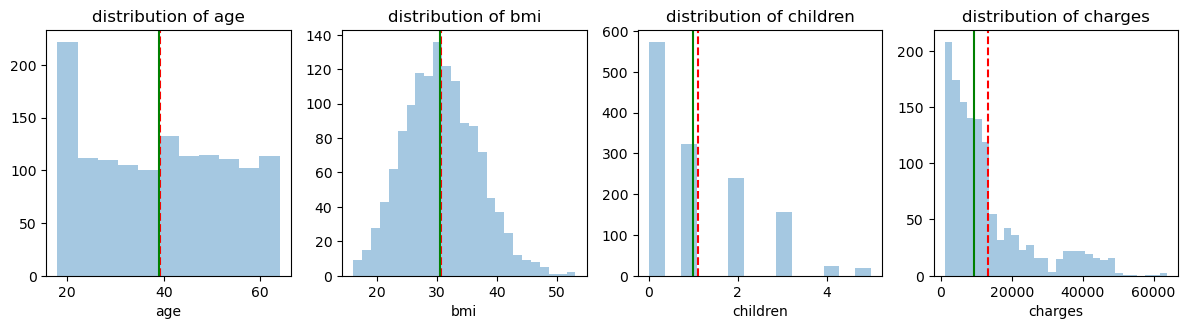

In [258]:
plt.figure(figsize=(12,6))

plt.subplot(2,4,1)
sns.distplot(df['age'], kde=False)
plt.title('distribution of age')
plt.axvline(df['age'].mean(), linestyle= '--', color='red')
plt.axvline(df['age'].median(), linestyle= '-', color='green')

plt.subplot(2,4,2)
sns.distplot(df['bmi'], kde=False)
plt.title('distribution of bmi')
plt.axvline(df['bmi'].mean(), linestyle= '--', color='red')
plt.axvline(df['bmi'].median(), linestyle= '-', color='green')

plt.subplot(2,4,3)
sns.distplot(df['children'], kde=False)
plt.title('distribution of children')
plt.axvline(df['children'].mean(), linestyle= '--', color='red')
plt.axvline(df['children'].median(), linestyle= '-', color='green')

plt.subplot(2,4,4)
sns.distplot(df['charges'], kde=False)
plt.title('distribution of charges')
plt.axvline(df['charges'].mean(), linestyle= '--', color='red')
plt.axvline(df['charges'].median(), linestyle= '-', color='green')

# plt.subplot(2,4,5)
# sns.distplot(df['charges'], kde=False)
# plt.title('distribution of charges')
# plt.axvline(df['charges'].mean(), linestyle= '--', color='red')
# plt.axvline(df['charges'].median(), linestyle= '-', color='green')

plt.tight_layout()
plt.show()

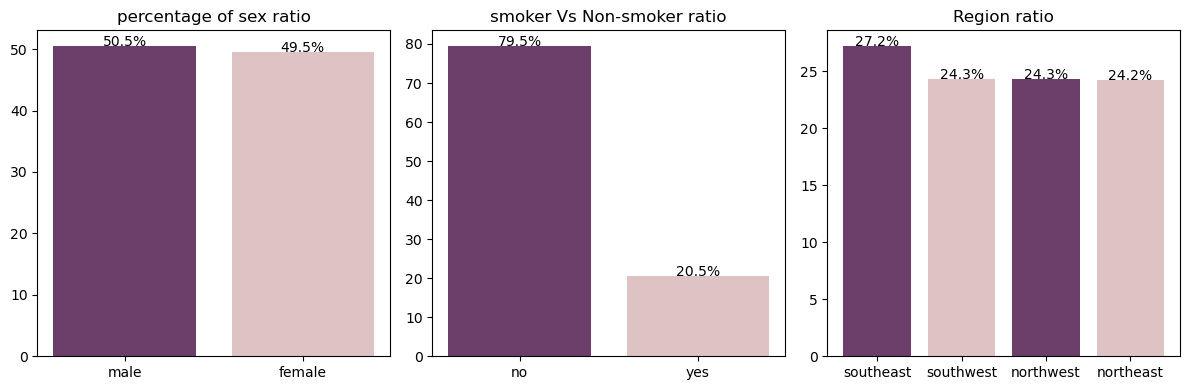

In [267]:
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
sex_counts = df['sex'].value_counts(normalize=True)*100
plt.bar(x= sex_counts.index, height= sex_counts, color = ['#6B3F69','#DDC3C3'])
plt.title('percentage of sex ratio')
for i, v in enumerate(sex_counts.values):
    plt.text(i, v, f"{v:.1f}%", ha='center', fontsize=10)

plt.subplot(1,3,2)
smoker_counts = df['smoker'].value_counts(normalize=True)*100
plt.bar(x= smoker_counts.index, height= smoker_counts, color = ['#6B3F69','#DDC3C3'])
plt.title('smoker Vs Non-smoker ratio')
for i, v in enumerate(smoker_counts.values):
    plt.text(i, v, f"{v:.1f}%", ha='center', fontsize=10)

plt.subplot(1,3,3)
region_counts = df['region'].value_counts(normalize=True)*100
plt.bar(x= region_counts.index, height= region_counts, color = ['#6B3F69','#DDC3C3'])
plt.title('Region ratio')
for i, v in enumerate(region_counts.values):
    # plt.text(i, v, f"{v:.2f}%", ha='center', fontsize=10)
    plt.text(i,v,f"{v:.1f}%", ha='center')

plt.tight_layout()
plt.show()


## Bivariate & Multivariate

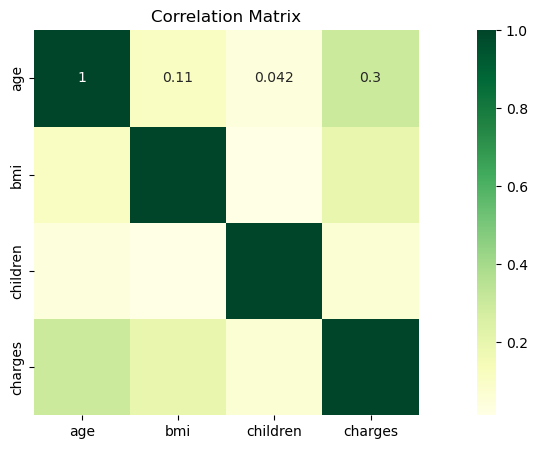

In [77]:
plt.figure(figsize=(15,5))
sns.heatmap(df.select_dtypes(include='number').corr(), annot= True, cmap="YlGn", square= True, fmt='.2g')
plt.title('Correlation Matrix')

plt.show()

In [80]:
categorical_cols = df.select_dtypes(exclude='number').columns

In [81]:
numeric_cols = df.select_dtypes(include='number').columns

In [82]:
categorical_cols, numeric_cols

(Index(['sex', 'smoker', 'region'], dtype='object'),
 Index(['age', 'bmi', 'children', 'charges'], dtype='object'))

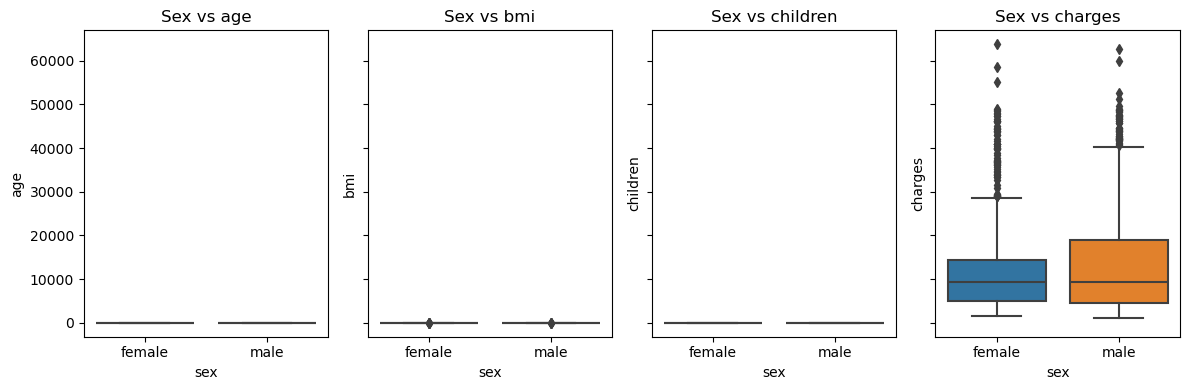

In [105]:
fig, axes = plt.subplots(1, 4, figsize=(12, 4), sharey=True)
axes = axes.flatten()

for ax, col in zip(axes, numeric_cols):
    sns.boxplot(data=df, x='sex', y=col, ax=ax)
    ax.set_title(f"Sex vs {col}")

plt.tight_layout()
plt.show()

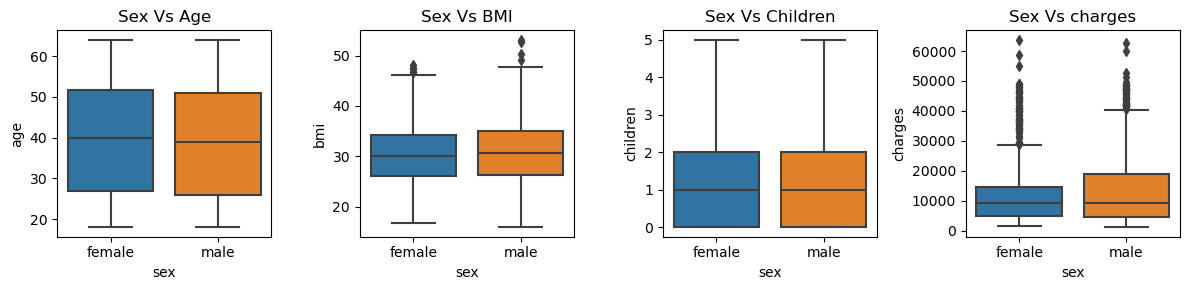

In [110]:
plt.figure(figsize=(12,3))

plt.subplot(1,4,1)
sns.boxplot(data = df, x=df['sex'], y=df['age'])
plt.title('Sex Vs Age')

plt.subplot(1,4,2)
sns.boxplot(data = df, x=df['sex'], y=df['bmi'])
plt.title('Sex Vs BMI')

plt.subplot(1,4,3)
sns.boxplot(data = df, x=df['sex'], y=df['children'])
plt.title('Sex Vs Children')

plt.subplot(1,4,4)
sns.boxplot(data = df, x=df['sex'], y=df['charges'])
plt.title('Sex Vs charges')

plt.tight_layout()
plt.show()

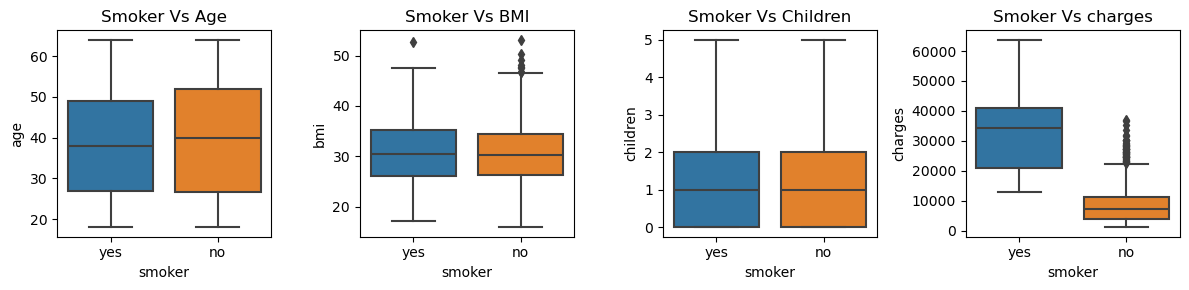

In [111]:
plt.figure(figsize=(12,3))

plt.subplot(1,4,1)
sns.boxplot(data = df, x=df['smoker'], y=df['age'])
plt.title('Smoker Vs Age')

plt.subplot(1,4,2)
sns.boxplot(data = df, x=df['smoker'], y=df['bmi'])
plt.title('Smoker Vs BMI')

plt.subplot(1,4,3)
sns.boxplot(data = df, x=df['smoker'], y=df['children'])
plt.title('Smoker Vs Children')

plt.subplot(1,4,4)
sns.boxplot(data = df, x=df['smoker'], y=df['charges'])
plt.title('Smoker Vs charges')

plt.tight_layout()
plt.show()

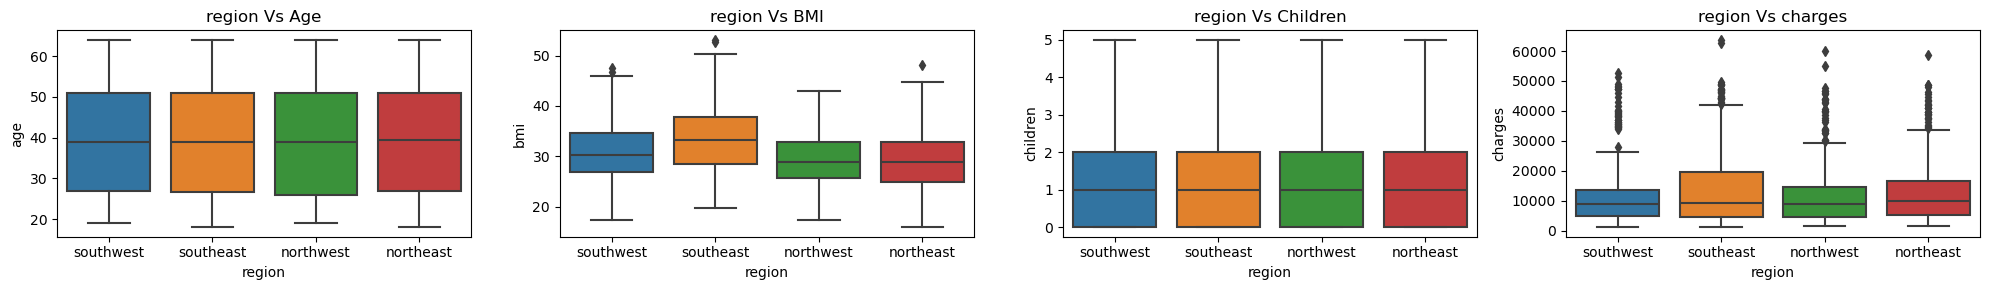

In [117]:
plt.figure(figsize=(20,3))

plt.subplot(1,4,1)
sns.boxplot(data = df, x=df['region'], y=df['age'])
plt.title('region Vs Age')

plt.subplot(1,4,2)
sns.boxplot(data = df, x=df['region'], y=df['bmi'])
plt.title('region Vs BMI')

plt.subplot(1,4,3)
sns.boxplot(data = df, x=df['region'], y=df['children'])
plt.title('region Vs Children')

plt.subplot(1,4,4)
sns.boxplot(data = df, x=df['region'], y=df['charges'])
plt.title('region Vs charges')

plt.tight_layout()
plt.show()

In [127]:
smoker_vs_sex_grouped = df.groupby(['smoker','sex'])[['sex']].count()
smoker_vs_sex_grouped = smoker_vs_sex_grouped.rename(columns={'sex':'count'})
smoker_vs_sex_grouped = smoker_vs_sex_grouped.reset_index()
smoker_vs_sex_grouped['perc'] = (smoker_vs_sex_grouped['count']/smoker_vs_sex_grouped['count'].sum())*100
smoker_vs_sex_grouped

,smoker,sex,count,perc
0,no,female,547,40.881913
1,no,male,517,38.639761
2,yes,female,115,8.594918
3,yes,male,159,11.883408


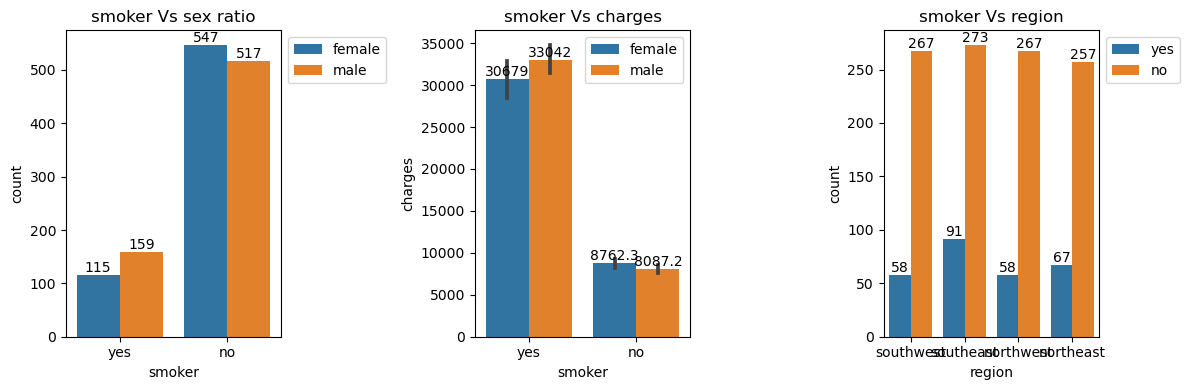

In [269]:
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
ax = sns.countplot(data=smoker_vs_sex_grouped, x=df['smoker'], hue= df['sex'])
for c in ax.containers:
    ax.bar_label(c, fmt='%g')
plt.title('smoker Vs sex ratio')
plt.legend(bbox_to_anchor=(1.00, 1))

plt.subplot(1,3,2)
ax = sns.barplot(data=df, x=df['smoker'], y= df['charges'], hue=df['sex'])
for c in ax.containers:
    ax.bar_label(c, fmt='%g')
plt.title('smoker Vs charges')
plt.legend(bbox_to_anchor=(1.00, 1))

plt.subplot(1,3,3)
ax = sns.countplot(data=df, x=df['region'], hue=df['smoker'])
for c in ax.containers:
    ax.bar_label(c, fmt='%g')
plt.title('smoker Vs region')
plt.legend(bbox_to_anchor=(1.00, 1))

plt.tight_layout()
plt.show()

In [165]:
children_avg_charges = df.groupby(df['children']).agg(avg_charges=('charges','mean')).reset_index()
children_avg_charges

,children,avg_charges
0,0,12365.975602
1,1,12731.171832
2,2,15073.563734
3,3,15355.318367
4,4,13850.656311
5,5,8786.035247


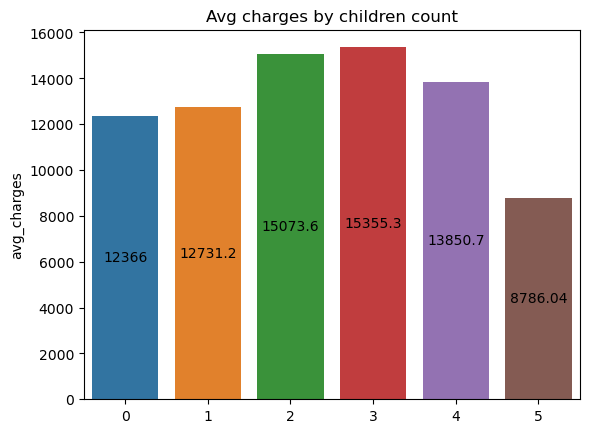

In [197]:
ax = sns.barplot(data= children_avg_charges, x=children_avg_charges.index, y=children_avg_charges['avg_charges'])
for c in ax.containers:
    ax.bar_label(c, label_type='center')
plt.title('Avg charges by children count')
plt.show()

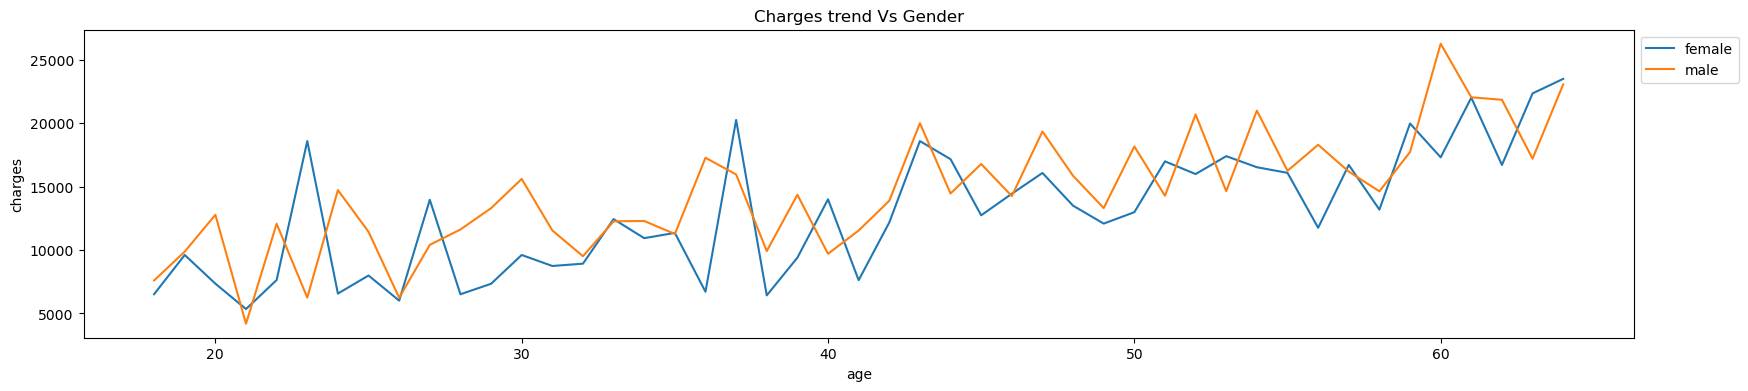

In [178]:
plt.figure(figsize=(20,4))
sns.lineplot(data=df, x=df['age'], y=df['charges'], hue=df['sex'], markers = 'x', errorbar= None, linestyle = '-')
plt.title('Charges trend Vs Gender')
plt.legend(bbox_to_anchor=(1.00, 1))

plt.show()

In [184]:
df['bmi_group'] = pd.cut(df['bmi'], bins= [15,25,35,45,55], labels= ['15-25','25-35','35-45','45-55'])

In [186]:
bmi_group_avg_charges = df.groupby('bmi_group')['charges'].mean()
bmi_group_avg_charges

bmi_group
15-25    10284.290025
25-35    12720.254311
35-45    16913.681515
45-55    17547.926750
Name: charges, dtype: float64

In [188]:
df['age_group'] = pd.cut(df['age'], bins= [18,28,38,48,58,68], labels=['18-28','28-38','38-48','48-58','58-68'])

In [199]:
age_group_avg_charges = df.groupby('age_group')['charges'].mean()
age_group_avg_charges

age_group
18-28     9528.142786
28-38    11598.554943
38-48    14334.585843
48-58    15887.954341
58-68    20824.972901
Name: charges, dtype: float64

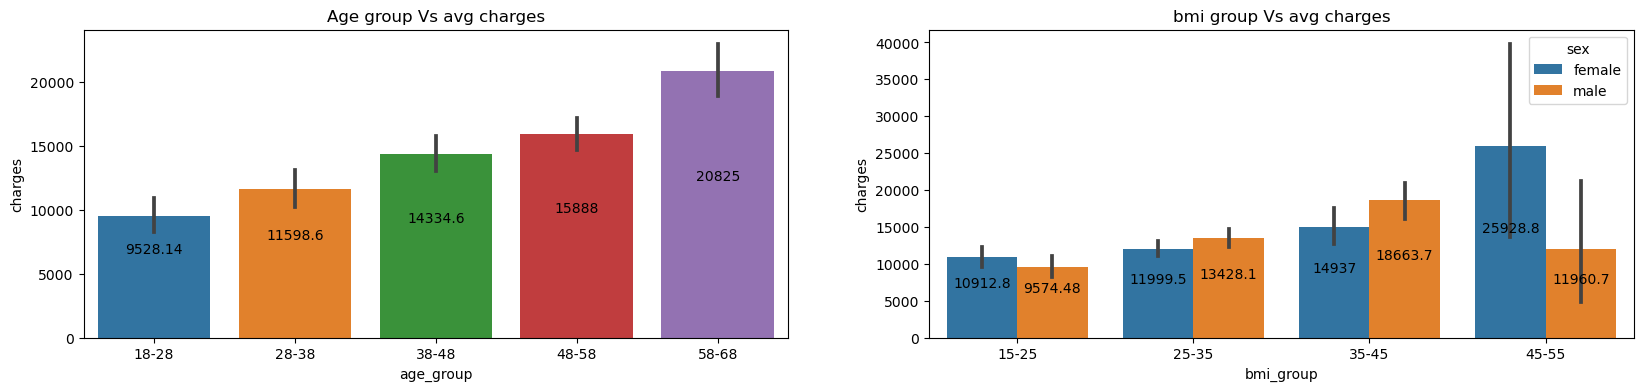

In [204]:
plt.figure(figsize=(20,4))

plt.subplot(1,2,1)
ax = sns.barplot(data=df, x=df['age_group'], y=df['charges'])
plt.title('Age group Vs avg charges')
for c in ax.containers:
    ax.bar_label(c, padding=20, label_type='center')

plt.subplot(1,2,2)
ax = sns.barplot(data=df, x=df['bmi_group'], y=df['charges'], hue=df['sex'])
plt.title('bmi group Vs avg charges')
for c in ax.containers:
    ax.bar_label(c, padding=10, label_type='center')

plt.show()

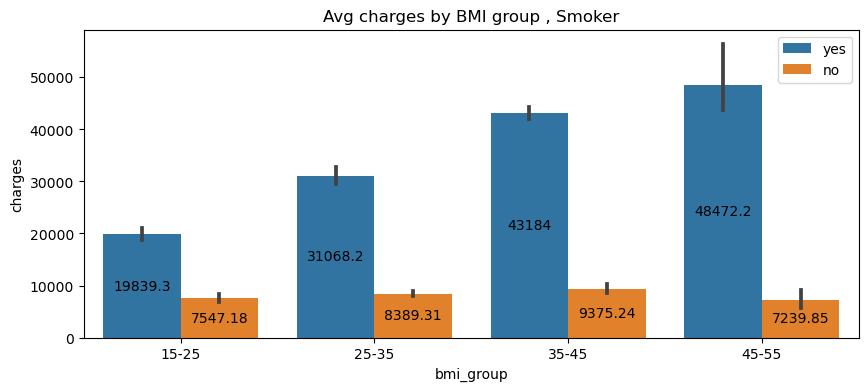

In [271]:
plt.figure(figsize=(10,4))
ax = sns.barplot(data=df, x=df['bmi_group'], y=df['charges'], hue=df['smoker'])
plt.title('Avg charges by BMI group , Smoker')
for c in ax.containers:
    ax.bar_label(c, label_type='center')

plt.legend(bbox_to_anchor=(1.00,1))
plt.show()

# Statistical Analysis

## 1. medical claims made by the people who smoke is greater than those who don't?

### Step 1: Define null and alternative hypothesis

### Step 2: Decide the significance leve

In [215]:
alpha = 0.05

### Step 3: Identify the test

In [ ]:
Standard deviation of the population is not known ,will perform a T stat test

### Step 4: Calculate the test-statistics and p-value

In [227]:
smoker_yes = df[df['smoker'] == 'yes']['charges']

In [228]:
smoker_no = df[df['smoker'] == 'no']['charges']

In [229]:
smoker_yes.shape[0], smoker_no.shape[0]

(274, 1064)

### # Adjusting the size of the rows to be equal

In [226]:
smoker_no[:274]

,age,sex,bmi,children,smoker,region,charges,bmi_group,age_group
1,18,male,33.770,1,no,southeast,1725.55230,25-35,NaN
2,28,male,33.000,3,no,southeast,4449.46200,25-35,18-28
3,33,male,22.705,0,no,northwest,21984.47061,15-25,28-38
4,32,male,28.880,0,no,northwest,3866.85520,25-35,28-38
5,31,female,25.740,0,no,southeast,3756.62160,25-35,28-38
...,...,...,...,...,...,...,...,...,...
350,57,female,23.180,0,no,northwest,11830.60720,15-25,48-58
351,50,female,25.600,0,no,southwest,8932.08400,25-35,48-58
352,30,female,27.700,0,no,southwest,3554.20300,25-35,28-38
353,33,male,35.245,0,no,northeast,12404.87910,35-45,28-38


In [232]:
print(f"Average cost charged to smoker is {smoker_yes.mean()} and non-smoker is {smoker_no.mean()}")

Average cost charged to smoker is 32050.23183153284 and non-smoker is 8434.268297856204


In [247]:
t_statistics_1, p_value_1 = stats.ttest_ind(smoker_yes, smoker_no)

p_value_onetail = p_value_1/2 

In [248]:
print(f"T-statistics >> {t_statistics_1}")

print(f"p_value_1 >> {p_value_1}")

print(f"p_value_onetail >> {p_value_onetail}")

T-statistics >> 46.66492117272371
p_value_1 >> 8.271435842179102e-283
p_value_onetail >> 4.135717921089551e-283


In [239]:
if p_value_1 < alpha:
    print('reject null hypothesis')
    print('conclusion: The average charges of smokers is greater than or equal to nonsmokers')
else:
    print('fail to reject null hypothesis')
    print('conclusion: The average charges of smokers is less than or equal to nonsmokers')

reject null hypothesis
conclusion: The average charges of smokers is greater than or equal to nonsmokers


## 2 BMI of females is different from that of males

In [243]:
df_female = df[df['sex'] == 'female']['bmi']

df_male = df[df['sex'] == 'male']['bmi']

In [244]:
print(f"BMI mean for female >> {df_female.mean()}")

print(f"BMI mean for male >> {df_male.mean()}")

BMI mean for female >> 30.37774924471299
BMI mean for male >> 30.943128698224854


In [250]:
T_statistcs, p_value = stats.ttest_ind(df_female, df_male)

In [251]:
print(f"T_statistcs >> {T_statistcs}")

print(f"p_value >> {p_value}")

T_statistcs >> -1.696752635752224
p_value >> 0.08997637178984932


In [252]:
if p_value < alpha:
    print('reject null hypothesis')
    print('conclusion: There is  difference between the BMI of Male and BMI of female')
else:
    print('fail to reject null hypothesis')
    print('conclusion: There is no difference between the BMI of Male and BMI of female')

fail to reject null hypothesis
conclusion: There is no difference between the BMI of Male and BMI of female


## 3 Is the proportion of smokers significantly different across different regions?

In [ ]:
Ho >> There is no signficant difference across different regions 
Ha >> There is signficant difference across different regions

In [272]:
alpha = 0.05

In [287]:
contigency_table = pd.crosstab(index= df['region'], columns=df['smoker'])

In [288]:
contigency_table

smoker,no,yes
region,,
northeast,257,67
northwest,267,58
southeast,273,91
southwest,267,58


<Figure size 1000x500 with 0 Axes>

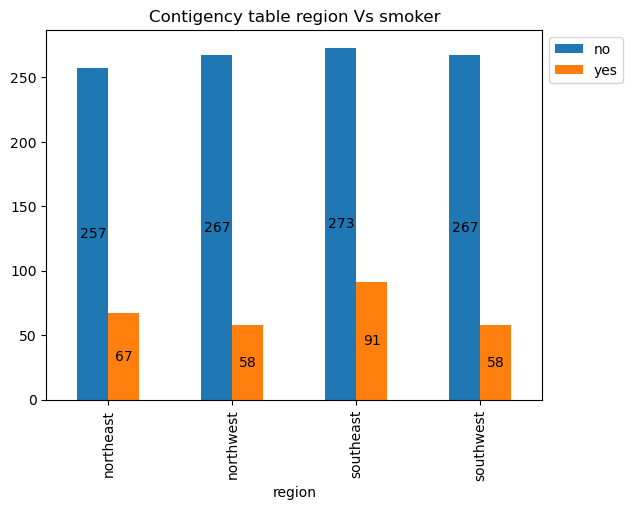

In [298]:
plt.figure(figsize=(10,5))
ax = contigency_table.plot(kind= 'bar')
plt.title("Contigency table region Vs smoker")
for c in ax.containers:
    ax.bar_label(c, label_type='center')

plt.legend(bbox_to_anchor=(1.00,1))
plt.show()

In [301]:
chi2_statistic, p_value, dof, expected_freq = chi2_contingency(contigency_table, correction= False)

In [302]:
p_value

0.06171954839170541

In [304]:
if p_value < alpha:
    print('Reject Null hypothesis')
    print('conclusion >> There is signficant difference across different regions')
else:
    print('fail to reject Null hypothesis')
    print('Conculsion >> There is no signficant difference across different regions')

fail to reject Null hypothesis
Conculsion >> There is no signficant difference across different regions
